## Supplement 4: Classification

In [1]:
%matplotlib inline
import numpy as np

# preprocessing
data_train = np.genfromtxt('train-songs.csv', delimiter=',', skip_header=1)
data_test  = np.genfromtxt('test-songs.csv',  delimiter=',', skip_header=1)



X_test = data_test[:, 0:8]
y_test = data_test[:, -1]
X_train = data_train[:, 0:8]
y_train = data_train[:, -1]



### 4.3 Programming Task: Song popularity prediction using Logistic regression
The datasets __train-songs.csv__ and __test-songs.csv__ contain audio properties of various tracks collected from the music streaming site Spotify.


The goal of the task is to train a logistic regression classifier that predicts if
a given track is popular or not.
The dataset consists of 9 columns.
The first 8 columns contain various audio properties
which are provided as input features to the model.
The last column contains the class labels given by 0(not popular) and 1(popular).

i\. Implement the loss function and its gradient for the logistic regression model.
 

In [2]:
def J(y,y_pred):
    m = len(y)
    cost = -(1/m) * np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))
    return cost

def sigmoid(z):
    return 1/(1+np.exp(-z))

   ii\. Using the gradient descent algorithm, train the logistic regression model.
You may reuse/modify the gradient descent algorithm from the previous supplement.




In [3]:
def gradient(X, y, lr=0.01, epochs=1000):
    m, n_features = X.shape
    w = np.zeros(n_features)


    for _ in range(epochs):
        z = X @ w                
        y_pred = sigmoid(z)      
        dw = (1/m) * (X.T @ (y_pred - y))
        w -= lr * dw


    return w


iii\. Using model predictions on __test-songs.csv__, build the confusion
matrix and subsequently calculate the precision, recall, and F1-score for a threshold of 0.4.


In [4]:
weights = gradient(X_test,y_test)



z = np.dot(X_test, weights)
y_prob = 1 / (1 + np.exp(-z))
threshold = 0.4
y_pred = (y_prob >= threshold).astype(int)

TP = np.sum((y_pred == 1) & (y_test == 1))
TN = np.sum((y_pred == 0) & (y_test == 0))
FP = np.sum((y_pred == 1) & (y_test == 0))
FN = np.sum((y_pred == 0) & (y_test == 1))

# Calculate Metrics
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
confusion_matrix = np.array([[TN, FP], [FN, TP]])

# Output
print("Confusion Matrix (TN, FP, FN, TP):")
print(confusion_matrix)
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1_score:.4f}")

Confusion Matrix (TN, FP, FN, TP):
[[953  47]
 [706 294]]
Precision: 0.8622
Recall:    0.2940
F1 Score:  0.4385


iv\. Plot the ROC curve for the model and calculate the AUC metric of your model.


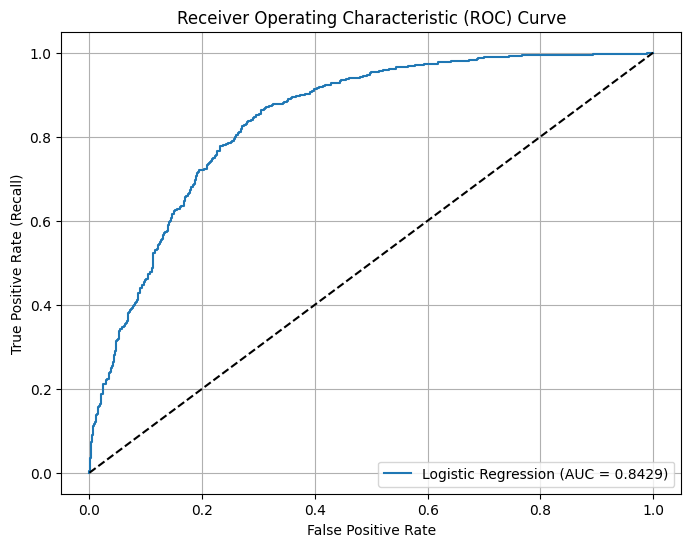

The Area Under the Curve (AUC) metric is: 0.8429


In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--') # Diagonal line (Random Classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"The Area Under the Curve (AUC) metric is: {auc_score:.4f}")

v\. Consider the simpler models given below.The input $\mathbf{x}$ in these models takes only 4 input features from the given dataset.

- Model A $~~~~~~~~~~~$   $\mathbf{x}$ = $[$ danceability, key, valence, tempo $]^\top$
- Model B $~~~~~~~~~~~$  $\mathbf{x}$ = $[$ danceability, loudness, acousticness, instrumentalness $]^\top$
- Model C $~~~~~~~~~~~$ $\mathbf{x}$ = $[$ key, liveness, valence, tempo $]^\top$

Train these models using your logistic regression implementation and determine the best performing model using the AUC metric.

In [6]:
# Model A
X_testA = data_test[:, [0, 1, 6, 7]]
y_testA = data_test[:, -1]
weights_A = gradient(X_testA, y_testA)
z_A = X_testA @ weights_A
y_prob_A = 1 / (1 + np.exp(-z_A))
auc_A = roc_auc_score(y_testA, y_prob_A)

# Model B
X_testB = data_test[:, [0, 2, 3, 4]]
y_testB = data_test[:, -1]
weights_B = gradient(X_testB, y_testB)
z_B = X_testB @ weights_B
y_prob_B = 1 / (1 + np.exp(-z_B))
auc_B = roc_auc_score(y_testB, y_prob_B)

# Model C
X_testC = data_test[:, [2, 5, 6, 7]]
y_testC = data_test[:, -1]
weights_C = gradient(X_testC, y_testC)
z_C = X_testC @ weights_C
y_prob_C = 1 / (1 + np.exp(-z_C))
auc_C = roc_auc_score(y_testC, y_prob_C)

# Output Results
print(f"AUC Score for Model A: {auc_A:.4f}")
print(f"AUC Score for Model B: {auc_B:.4f}")
print(f"AUC Score for Model C: {auc_C:.4f}")

AUC Score for Model A: 0.4803
AUC Score for Model B: 0.8719
AUC Score for Model C: 0.8408
